In [1]:
import sys
sys.path.insert(0, '../code/')
from dismod_db import DismodDB
from two_level import TwoLevel
from plot_two_level import PlotTwoLevel
import numpy as np
import pandas as pd
from dismod_output import DismodOutput

#### Build database

In [2]:
data = pd.read_csv('./data/diabetes_sinc_1000_loc.csv')
integrand = ['Sincidence']
locations = ['Australia', 'New Zealand']
location_name_to_id = {}
for i, row in data[data['location_name'].isin(locations)].iterrows():
    location_name_to_id[row['location_name']] = row['location_id']
    if len(location_name_to_id) == len(locations):
        break
print(location_name_to_id)

{'Australia': 71, 'New Zealand': 72}


In [3]:
rates = ['iota']
#meas_noise_density = {'Sincidence':{'density':'students', 'nu': 30}}
meas_noise_density = {'Sincidence': {'density': 'gaussian'}}
rates_parent_priors = [
    # rate priors for iota
    ({'density':'uniform','upper':1.0,'lower':1e-16,'mean': .0001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .0001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .0001})]
rates_child_priors = [
    # rate priors for iota
    ({'density':'gaussian','mean': 0.0, 'std': .1}, None, None)]
#---------change path------------
path_to_db = './data/incidence_two_level.db'

db = DismodDB(data, locations, integrand,rates, rates_parent_priors, 
              rates_child_priors, meas_noise_density,path_to_db)

#### Train model

In [4]:
model = TwoLevel(db)

In [5]:
model.initialize()

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level.db init


In [6]:
model.fit_both(zero_sum=True, tol=1e-10)

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level.db init
./data/incidence_two_level.db fit fixed
./data/incidence_two_level.db predict fit_var
./data/incidence_two_level.db set start_var fit_var
./data/incidence_two_level.db fit both
./data/incidence_two_level.db predict fit_var


{1: 'Australia', 2: 'New Zealand', 0: 'all'}


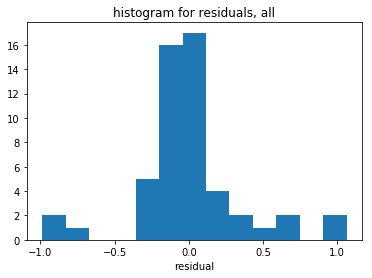

In [7]:
path = './data/'
plt = PlotTwoLevel(path, 'incidence_two_level.db')
plt.plot_residuals('all')

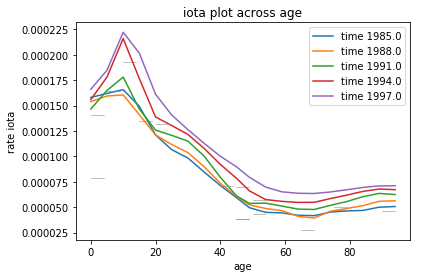

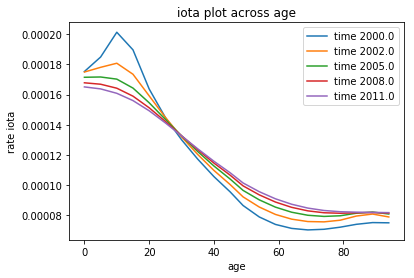

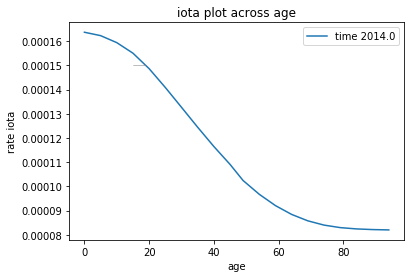

In [8]:
plt.plot_change_over_age('rate', 'iota', 'Sincidence', 'Australia')

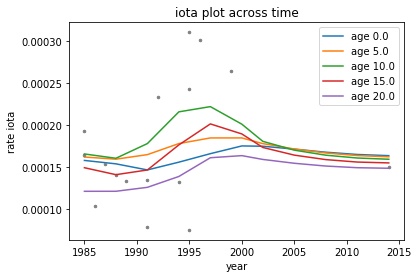

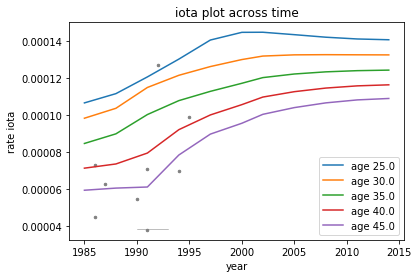

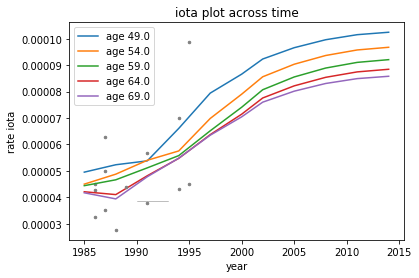

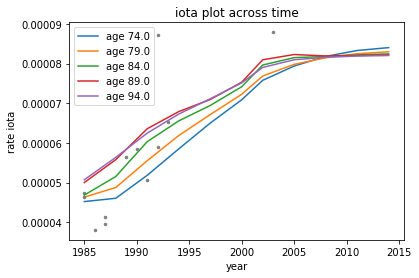

In [9]:
plt.plot_change_over_time('rate', 'iota', 'Sincidence', 'Australia')

#### compute GBD integrands

In [10]:
output = DismodOutput(path_to_db)
output.save_GBD_output(['Sincidence', 'prevalence'], list(range(1980, 2019)), [1], location_name_to_id, './data/incidence_gbd_sample.csv')

{1: 'Australia', 2: 'New Zealand', 0: 'all'}
./data/incidence_two_level_gbd.db
[[0.0, 'Sincidence'], [0.0, 'prevalence']]
./data/incidence_two_level_gbd.db predict fit_var


In [11]:
df = pd.read_csv('./data/incidence_gbd_sample.csv')

In [12]:
df.head()

,location_id,age_group_id,sex_id,year_id,measure_id,mean,lower,upper
0,71,2,1,1985,41,0.000158,0.000158,0.000158
1,72,2,1,1985,41,0.000151,0.000151,0.000151
2,71,2,1,1986,41,0.000157,0.000157,0.000157
3,72,2,1,1986,41,0.000150,0.000150,0.000150
4,71,2,1,1987,41,0.000155,0.000155,0.000155


#### Use students t

In [9]:
data = pd.read_csv('./data/diabetes_sinc_1000_loc.csv')
path2 = './data/incidence_two_level_st.db'
meas_noise_density2 = {'Sincidence':{'density':'students', 'nu': 10}}
db2 = DismodDB(data, locations, integrand,rates, rates_parent_priors, 
              rates_child_priors, meas_noise_density2,path2)

In [10]:
model2 = TwoLevel(db2)

In [11]:
model2.initialize()

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level_st.db init


In [12]:
model2.fit_both(zero_sum=True, fit_gaussian=True, tol=1e-10, db2csv=True)

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level_st.db init
./data/incidence_two_level_st.db fit fixed
./data/incidence_two_level_st.db set start_var fit_var
/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level_st.db init
./data/incidence_two_level_st.db fit both
./data/incidence_two_level_st.db predict fit_var


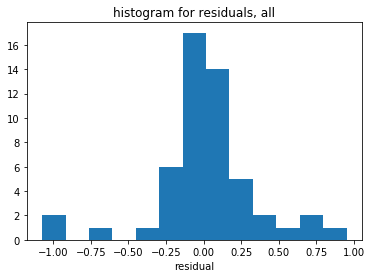

In [13]:
path = './data/'
plt = PlotTwoLevel(path, 'incidence_two_level_st.db')
plt.plot_residuals('all')

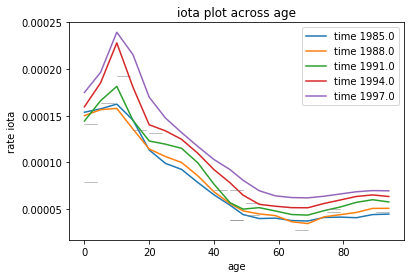

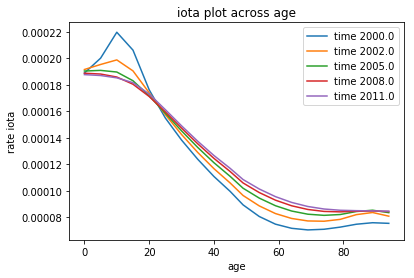

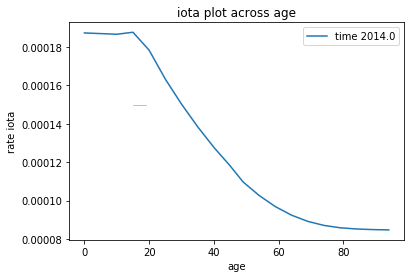

In [14]:
plt.plot_change_over_age('rate', 'iota', 'Sincidence', 'Australia')

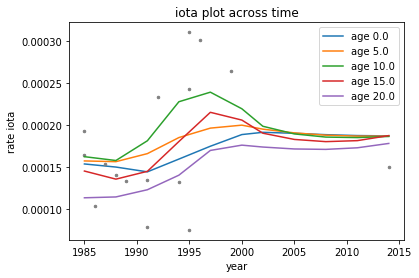

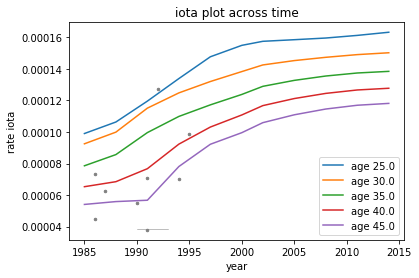

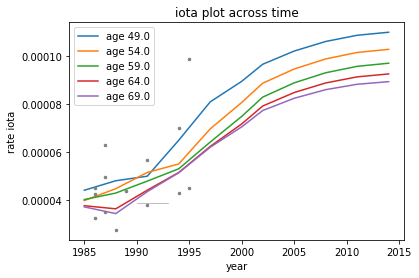

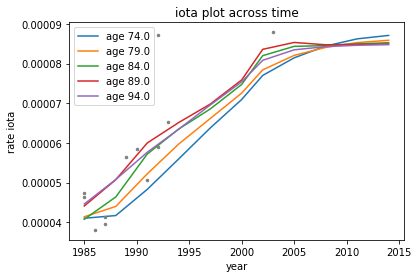

In [15]:
plt.plot_change_over_time('rate', 'iota', 'Sincidence', 'Australia')